# Linear Regression - Implementation

Here, we use car dataset and predict its respective price. we achieve it through series of steps from Data cleaning, Data preparation, Feature selection, Model Building.

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  
#included to embed the graph inside the browser

In [8]:
f = pd.read_csv('carprice.csv')
f.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

# 1. Data Exploration

| Columns       | Usage                                    | 
| ------------- |:----------------------------------------:|
| Car ID        | Primary Key ID                           |
| Symboling     | Riskyness (-2 least risky to +3 most risky)                                |
| aspiration    | engine property showing standard / turbo |
|drive wheel     |frontwheel, rear wheel or      four-wheel drive|
| wheelbase | distance between centre of front and rear wheels|
| curbweight | weight of car without occupants |
| stroke | volume of the engine |
| compression ration | ration of volume of compression chamber |

Let's visualize the data with distplot which allow you to plot the distributions of numeric variables.

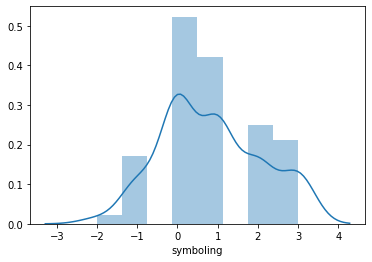

In [13]:
sns.distplot(f['symboling'])

# Most cars are between 0,1,2

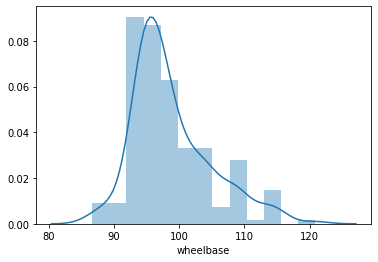

In [16]:
sns.distplot(f['wheelbase'])

# Most data points with distance between centre of front and rear wheels lies between 90 - 100.

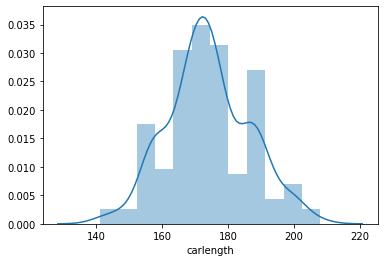

In [22]:
sns.distplot(f['carlength'])
# Most data points have car length from 165 - 190

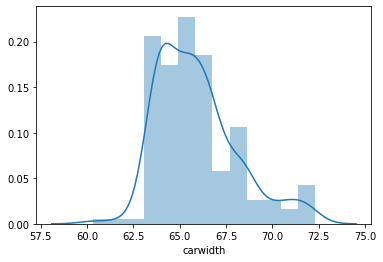

In [24]:
sns.distplot(f['carwidth'])
# similarly carwidth data lies from 63 - 68

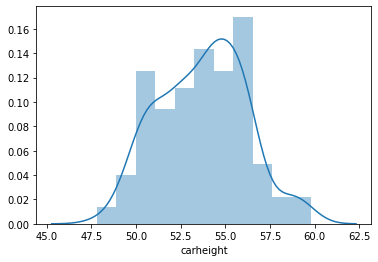

In [25]:
sns.distplot(f['carheight'])

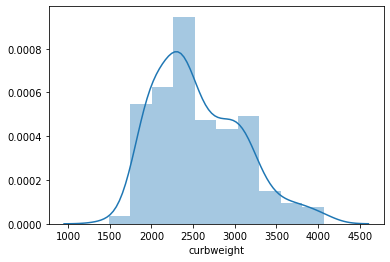

In [26]:
sns.distplot(f['curbweight'])

Text(0.5, 1.0, 'Count Of Cars By Price')

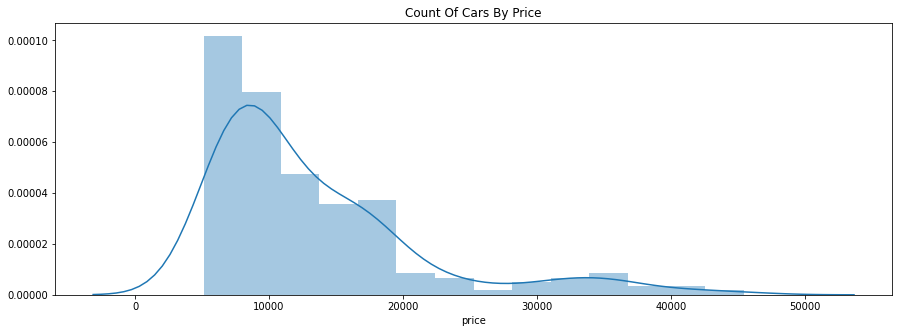

In [47]:
fig, ax= plt.subplots(1,1,figsize=(15,5))

sns.distplot(f['price'],ax=ax)
ax.set_title('Count Of Cars By Price')

# maximum number of car price ranges from 5000 - 10000

To perform linear regression, the target variable should be linearly related to independent variables.

In [56]:
# selecting only the numerical data values

num_val = f.select_dtypes(include=['float64','int64'])
num_val

car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           130       3.47    2.68               9.0         111     5000   
1           130       3.47    2.68               9.0         111     5000   
2           152       2.68    3.47               9.0         154     5000   
3           109       3.19    3.40              10.0         102     5500   
4           136       3.19    3.40               8.0         115     5500   
..          ...        ...     ...               ...         ...      ...   
200         141       3.78    3.15               9.5         114     5400   
201         141       3.78    3.15               8.7         160     5300   
202         173       3.58    2.87               8.8         134     5500   
203         145       3.01    3.40              23.0         106     4800   
204         141       3.78    3.15               9.5         114     5400   

     citympg  highwaympg    price  
0         21          27  13495.0  
1         21          27  16500.0  
2         19          26  16500.0  
3         24          30  13950.0  
4         18          22  17450.0  
..       ...         ...      ...  
200       23          28  16845.0  
201       19          25  19045.0  
202       18          23  21485.0  
203       26          27  22470.0  
204       19          25  22625.0  

[205 rows x 16 columns]

### Car_ID can be removed as it is only a primary key which will not be used to perform linear regression

In [57]:
num_val = num_val.drop(['car_ID'],axis=1)

# drop function is used to drop a data, mention axis as 1 to represent row/column

### Similarly, Symboling can be removed as it only contains values from -1 to 3

In [59]:
num_val = num_val.drop(['symboling'],axis=1)

num_val

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0         88.6      168.8      64.1       48.8        2548         130   
1         88.6      168.8      64.1       48.8        2548         130   
2         94.5      171.2      65.5       52.4        2823         152   
3         99.8      176.6      66.2       54.3        2337         109   
4         99.4      176.6      66.4       54.3        2824         136   
..         ...        ...       ...        ...         ...         ...   
200      109.1      188.8      68.9       55.5        2952         141   
201      109.1      188.8      68.8       55.5        3049         141   
202      109.1      188.8      68.9       55.5        3012         173   
203      109.1      188.8      68.9       55.5        3217         145   
204      109.1      188.8      68.9       55.5        3062         141   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0         3.47    2.68               9.0         111     5000       21   
1         3.47    2.68               9.0         111     5000       21   
2         2.68    3.47               9.0         154     5000       19   
3         3.19    3.40              10.0         102     5500       24   
4         3.19    3.40               8.0         115     5500       18   
..         ...     ...               ...         ...      ...      ...   
200       3.78    3.15               9.5         114     5400       23   
201       3.78    3.15               8.7         160     5300       19   
202       3.58    2.87               8.8         134     5500       18   
203       3.01    3.40              23.0         106     4800       26   
204       3.78    3.15               9.5         114     5400       19   

     highwaympg    price  
0            27  13495.0  
1            27  16500.0  
2            26  16500.0  
3            30  13950.0  
4            22  17450.0  
..          ...      ...  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[205 rows x 14 columns]

# Now, let's check the linear relation of price with each independent variables.

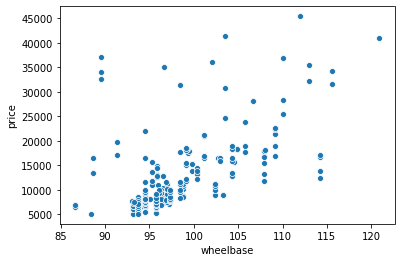

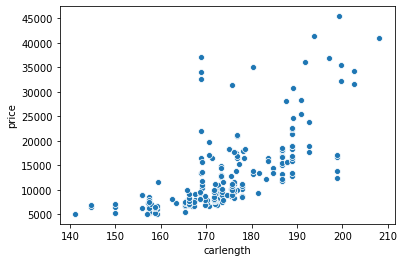

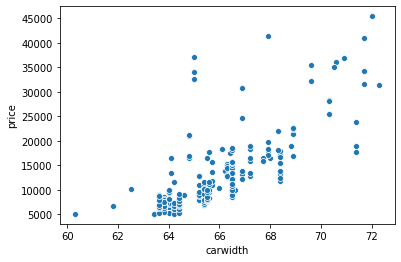

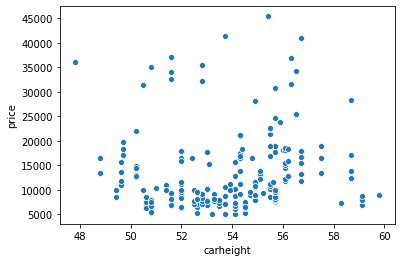

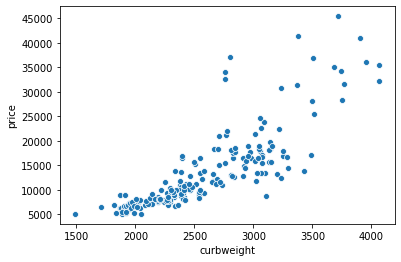

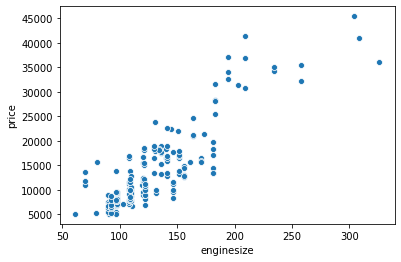

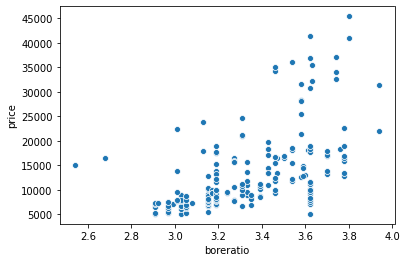

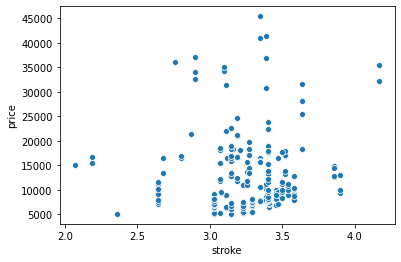

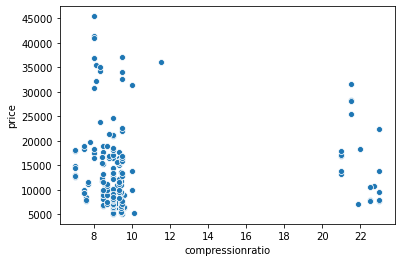

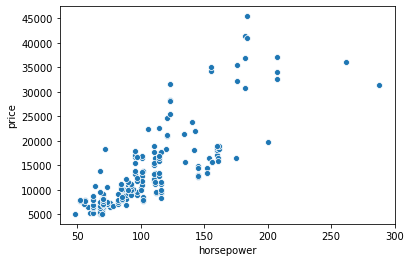

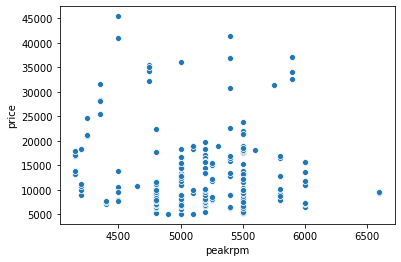

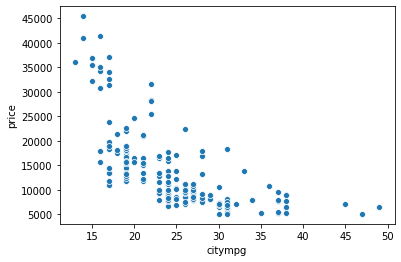

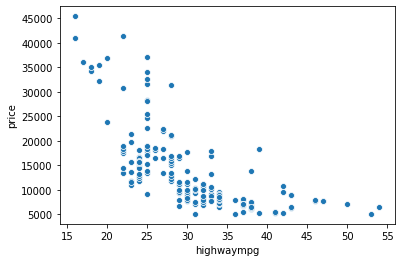

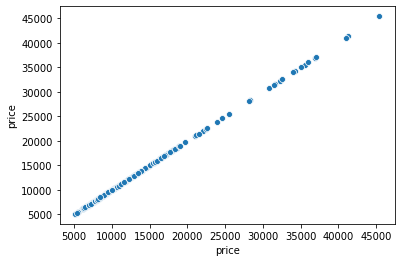

In [61]:
for i, c in enumerate (num_val.columns):
    plt.figure(i)
    sns.scatterplot(x = num_val[c],y = num_val['price'])

Linear Relation obeys with following columns:

    - carwidth
    - curbweight
    - enginesize
    - boreratio
    - horsepower
    - citympg

Let's correlate the factor with heatmap function

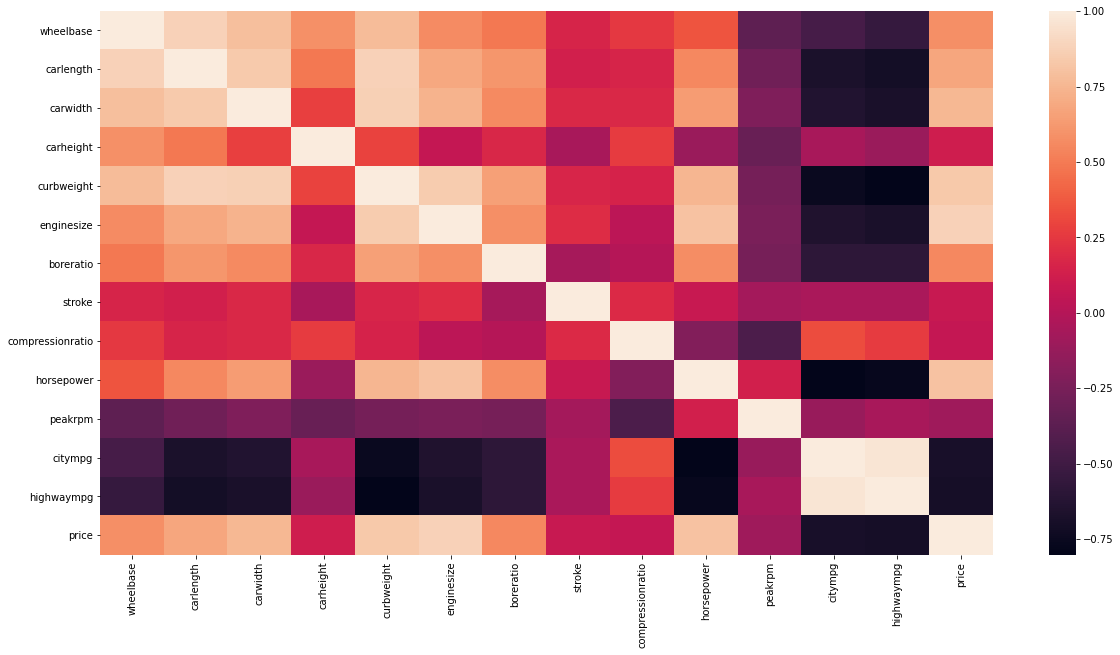

In [69]:
plt.figure(figsize = (20,10))
sns.heatmap(num_val.corr())

# Price highly correlated with enginesize, curbweight, horsepower, carwidth
# Many independent variables are highly correlated; wheelbase, carlength, curbweight, enginesize

# 2. Data Cleaning

In Data cleaning, first check whether any data is missing. This can be found whether the column is null/non-null

In [74]:
f.info()

# here, every columns are non-null, which concludes all the data are present.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [75]:
# List the car Names. It is represented with COMPANY_NAME-CAR_NAME
f['CarName'] 

# company name is more than sufficent to refer each cars.

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [76]:
# converting the car names to a single word.
carnames = f['CarName'].apply(lambda x: x.split(" ")[0])

#lambda is a anonymous function which executes iteratively for a given expression.

In [79]:
carnames.value_counts()

# It can be noted that same name represented in different forms.
# toyota being mis-spelled as toyouta
# volkswagen as vokswagen

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
chevrolet       3
alfa-romero     3
jaguar          3
maxda           2
vw              2
renault         2
vokswagen       1
Nissan          1
porcshce        1
mercury         1
toyouta         1
Name: CarName, dtype: int64

In [85]:
#volkswagen
f.loc[(f['company']=="vw")|(f['company']=="vokswagen"),"company"]="volkswagen"

#porsche

f.loc[(f['company']=="porcshce"),"company"]="porsche"

#toyota
f.loc[(f['company']=="toyouta"),"company"]="toyota"

# nissan
f.loc[f['company'] == "Nissan", 'company'] = 'nissan'

# mazda
f.loc[f['company'] == "maxda", 'company'] = 'mazda'

f['company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: company, dtype: int64

In [86]:
# concatenate the columns 
f['company']=carnames

In [87]:
f

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     fuelsystem  boreratio  stroke  compressionratio horsepower peakrpm  \
0          mpfi       3.47    2.68               9.0        111    5000   
1          mpfi       3.47    2.68               9.0        111    5000   
2          mpfi       2.68    3.47               9.0        154    5000   
3          mpfi       3.19    3.40              10.0        102    5500   
4          mpfi       3.19    3.40               8.0        115    5500   
..          ...        ...     ...               ...        ...     ...   
200        mpfi       3.78    3.15               9.5        114    5400   
201        mpfi       3.78    3.15               8.7        160    5300   
202        mpfi       3.58    2.87               8.8        134    5500   
203         idi       3.01    3.40              23.0        106    4800   
204        mpfi       3.78    3.15               9.5        114    5400   

     citympg highwaympg    price      company  
0         21         27  13495.0  alfa-romero  
1         21         27  16500.0  alfa-romero  
2         19         26  16500.0  alfa-romero  
3         24         30  13950.0         audi  
4         18         22  17450.0         audi  
..       ...        ...      ...          ...  
200       23         28  16845.0        volvo  
201       19         25  19045.0        volvo  
202       18         23  21485.0        volvo  
203       26         27  22470.0        volvo  
204       19         25  22625.0        volvo  

[205 rows x 27 columns]

# 3. Data Preparation

We need two data for features and targets. X is referred as feature data. Y refers to be Target data

In [130]:
x = f.drop(['price'],axis=1)

y = f['price']

In [131]:
# for categorical values, dummy variables are created as numerical values

x['symboling'] = x['symboling'].astype('object')
x = x.drop(['CarName'],axis=1)
# converting 'symboling' to object type

categorical = x.select_dtypes(include=['object'])
categorical

symboling fueltype aspiration doornumber      carbody drivewheel  \
0           3      gas        std        two  convertible        rwd   
1           3      gas        std        two  convertible        rwd   
2           1      gas        std        two    hatchback        rwd   
3           2      gas        std       four        sedan        fwd   
4           2      gas        std       four        sedan        4wd   
..        ...      ...        ...        ...          ...        ...   
200        -1      gas        std       four        sedan        rwd   
201        -1      gas      turbo       four        sedan        rwd   
202        -1      gas        std       four        sedan        rwd   
203        -1   diesel      turbo       four        sedan        rwd   
204        -1      gas      turbo       four        sedan        rwd   

    enginelocation enginetype cylindernumber fuelsystem      company  
0            front       dohc           four       mpfi  alfa-romero  
1            front       dohc           four       mpfi  alfa-romero  
2            front       ohcv            six       mpfi  alfa-romero  
3            front        ohc           four       mpfi         audi  
4            front        ohc           five       mpfi         audi  
..             ...        ...            ...        ...          ...  
200          front        ohc           four       mpfi        volvo  
201          front        ohc           four       mpfi        volvo  
202          front       ohcv            six       mpfi        volvo  
203          front        ohc            six        idi        volvo  
204          front        ohc           four       mpfi        volvo  

[205 rows x 11 columns]

In [132]:
cars_dummies = pd.get_dummies(categorical, drop_first=True)

In [133]:
cars_dummies

symboling_-1  symboling_0  symboling_1  symboling_2  symboling_3  \
0               0            0            0            0            1   
1               0            0            0            0            1   
2               0            0            1            0            0   
3               0            0            0            1            0   
4               0            0            0            1            0   
..            ...          ...          ...          ...          ...   
200             1            0            0            0            0   
201             1            0            0            0            0   
202             1            0            0            0            0   
203             1            0            0            0            0   
204             1            0            0            0            0   

     fueltype_gas  aspiration_turbo  doornumber_two  carbody_hardtop  \
0               1                 0               1                0   
1               1                 0               1                0   
2               1                 0               1                0   
3               1                 0               0                0   
4               1                 0               0                0   
..            ...               ...             ...              ...   
200             1                 0               0                0   
201             1                 1               0                0   
202             1                 0               0                0   
203             0                 1               0                0   
204             1                 1               0                0   

     carbody_hatchback  ...  company_porsche  company_renault  company_saab  \
0                    0  ...                0                0             0   
1                    0  ...                0                0             0   
2                    1  ...                0                0             0   
3                    0  ...                0                0             0   
4                    0  ...                0                0             0   
..                 ...  ...              ...              ...           ...   
200                  0  ...                0                0             0   
201                  0  ...                0                0             0   
202                  0  ...                0                0             0   
203                  0  ...                0                0             0   
204                  0  ...                0                0             0   

     company_subaru  company_toyota  company_toyouta  company_vokswagen  \
0                 0               0                0                  0   
1                 0               0                0                  0   
2                 0               0                0                  0   
3                 0               0                0                  0   
4                 0               0                0                  0   
..              ...             ...              ...                ...   
200               0               0                0                  0   
201               0               0                0                  0   
202               0               0                0                  0   
203               0               0                0                  0   
204               0               0                0                  0   

     company_volkswagen  company_volvo  company_vw  
0                     0              0           0  
1                     0              0           0  
2                     0              0           0  
3                     0              0           0  
4                     0              0           0  
..                  ...            ...         ...  
200                   0              1    

In [134]:
x=x.drop(columns=categorical)
x

car_ID  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1       88.6      168.8      64.1       48.8        2548   
1         2       88.6      168.8      64.1       48.8        2548   
2         3       94.5      171.2      65.5       52.4        2823   
3         4       99.8      176.6      66.2       54.3        2337   
4         5       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...       ...        ...         ...   
200     201      109.1      188.8      68.9       55.5        2952   
201     202      109.1      188.8      68.8       55.5        3049   
202     203      109.1      188.8      68.9       55.5        3012   
203     204      109.1      188.8      68.9       55.5        3217   
204     205      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           130       3.47    2.68               9.0         111     5000   
1           130       3.47    2.68               9.0         111     5000   
2           152       2.68    3.47               9.0         154     5000   
3           109       3.19    3.40              10.0         102     5500   
4           136       3.19    3.40               8.0         115     5500   
..          ...        ...     ...               ...         ...      ...   
200         141       3.78    3.15               9.5         114     5400   
201         141       3.78    3.15               8.7         160     5300   
202         173       3.58    2.87               8.8         134     5500   
203         145       3.01    3.40              23.0         106     4800   
204         141       3.78    3.15               9.5         114     5400   

     citympg  highwaympg  
0         21          27  
1         21          27  
2         19          26  
3         24          30  
4         18          22  
..       ...         ...  
200       23          28  
201       19          25  
202       18          23  
203       26          27  
204       19          25  

[205 rows x 14 columns]

In [135]:
# concatenate Columns
x=pd.concat([x,cars_dummies],axis=1)
x

car_ID  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1       88.6      168.8      64.1       48.8        2548   
1         2       88.6      168.8      64.1       48.8        2548   
2         3       94.5      171.2      65.5       52.4        2823   
3         4       99.8      176.6      66.2       54.3        2337   
4         5       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...       ...        ...         ...   
200     201      109.1      188.8      68.9       55.5        2952   
201     202      109.1      188.8      68.8       55.5        3049   
202     203      109.1      188.8      68.9       55.5        3012   
203     204      109.1      188.8      68.9       55.5        3217   
204     205      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  ...  company_porsche  \
0           130       3.47    2.68               9.0  ...                0   
1           130       3.47    2.68               9.0  ...                0   
2           152       2.68    3.47               9.0  ...                0   
3           109       3.19    3.40              10.0  ...                0   
4           136       3.19    3.40               8.0  ...                0   
..          ...        ...     ...               ...  ...              ...   
200         141       3.78    3.15               9.5  ...                0   
201         141       3.78    3.15               8.7  ...                0   
202         173       3.58    2.87               8.8  ...                0   
203         145       3.01    3.40              23.0  ...                0   
204         141       3.78    3.15               9.5  ...                0   

     company_renault  company_saab  company_subaru  company_toyota  \
0                  0             0               0               0   
1                  0             0               0               0   
2                  0             0               0               0   
3                  0             0               0               0   
4                  0             0               0               0   
..               ...           ...             ...             ...   
200                0             0               0               0   
201                0             0               0               0   
202                0             0               0               0   
203                0             0               0               0   
204                0             0               0               0   

     company_toyouta  company_vokswagen  company_volkswagen  company_volvo  \
0                  0                  0                   0              0   
1                  0                  0                   0              0   
2                  0                  0                   0              0   
3                  0                  0                   0              0   
4                  0                  0                   0              0   
..               ...                ...                 ...            ...   
200                0                  0                   0              1   
201                0                  0                   0              1   
202                0                  0                   0              1   
203                0                  0                   0              1   
204                0                  0                   0              1   

     company_vw  
0             0  
1             0  
2             0  
3             0  
4             0  
..          ...  
200           0  
201           0  
202           0  
203           0  
204           0  

[205 rows x 75 columns]

# Feature Scaling

Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

In [146]:
from sklearn.preprocessing import scale

c = x.columns
x = pd.DataFrame(scale(x))
x.columns=c
x.columns

# To avoid losing column data, It is stored in a variable & assigned after the scaling process.

Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_alfa-romero',
       'company_audi', 'company_bmw', 'company_buick', 'com

In [150]:
x.describe().loc[['mean','std'],:]

car_ID     wheelbase     carlength      carwidth     carheight  \
mean  0.000000  1.733031e-17  3.466062e-17  1.299773e-17 -1.733031e-17   
std   1.002448  1.002448e+00  1.002448e+00  1.002448e+00  1.002448e+00   

        curbweight    enginesize  boreratio        stroke  compressionratio  \
mean -1.733031e-17  8.665155e-18   0.000000  3.466062e-17      8.665155e-18   
std   1.002448e+00  1.002448e+00   1.002448  1.002448e+00      1.002448e+00   

      ...  company_porsche  company_renault  company_saab  company_subaru  \
mean  ...     1.733031e-17     8.665155e-18      0.000000    1.039819e-16   
std   ...     1.002448e+00     1.002448e+00      1.002448    1.002448e+00   

      company_toyota  company_toyouta  company_vokswagen  company_volkswagen  \
mean   -3.466062e-17         0.000000           0.000000        5.199093e-17   
std     1.002448e+00         1.002448           1.002448        1.002448e+00   

      company_volvo    company_vw  
mean       0.000000 -8.665155e-18  
std        1.002448  1.002448e+00  

[2 rows x 75 columns]

### In machine Learning, 80% of data holds as training data Set and 20% of data holds as Test Data set

In [196]:
from sklearn.model_selection import train_test_split

#importing the module

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

# Model Building

In [197]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# importing the module.

In [204]:
Model = LinearRegression()

# creates the variable model as the instance of LinearRegression.

In [207]:
model = LinearRegression().fit(x, y)

# calculate the optimal values of the weights ùëè‚ÇÄ and ùëè‚ÇÅ, using the existing input and output (x and y) as the arguments

In [209]:
model.score(x, y)

# coefficient of determination (ùëÖ¬≤)

0.9682919610958413

In [213]:
model.intercept_

# model basically finds the best value for the intercept and slope which results in a line that best fits the data.

13276.710570731706

In [214]:
model.coef_

array([ 7.68686272e+03,  1.07950709e+03, -1.82119850e+03,  1.31149936e+03,
       -2.77931620e+02,  3.19816236e+03,  3.56574050e+03, -6.31163961e+02,
       -5.80386965e+02, -3.48927584e+03,  2.05962720e+02,  1.00057544e+03,
        2.08729847e+02,  6.47705161e+02,  1.99462762e+02,  7.08973627e+02,
        7.23855251e+02,  3.69799027e+02,  1.99530013e+02, -1.91905049e+03,
        5.31111805e+02,  8.69281722e-01, -3.49580703e+02, -1.04176770e+03,
       -8.07649274e+02, -6.30306683e+02,  1.20229738e+02,  2.12101092e+02,
        1.40374277e+03, -3.34719383e+02, -2.70025434e+02,  4.99043694e+02,
       -2.64781059e+02, -6.49458091e+02,  4.36919254e+02, -1.28137664e+03,
       -1.10929395e+03, -8.73586427e+02,  2.91612397e+02, -2.92694919e+02,
        4.36919254e+02,  1.04366970e+03, -5.88246670e+01,  1.91905049e+03,
        3.38852955e+01,  5.07160527e+02,  1.86407290e+02,  1.37119835e+02,
        2.05861711e+03,  3.07538415e+03,  3.89808285e+03,  2.24238757e+03,
        9.50175261e+02,  

In [217]:
y_pred = model.predict(x_test)

In [219]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Compare the Actual vs. Predicted

Actual     Predicted
160   7738.0   8860.880100
186   8495.0   9488.662622
59    8845.0  10925.362223
165   9298.0   9153.450245
140   7603.0   6510.458375
64   11245.0  11482.322069
198  18420.0  17485.475776
75   16503.0  16503.000000
172  17669.0  15875.739819
104  17199.0  15990.745724
200  16845.0  18367.427117
136  18150.0  15313.560685
111  15580.0  14679.067824
41   12945.0  10751.466340
73   40960.0  42429.171246
31    6855.0   6357.718387
156   6938.0   7062.534848
133  12170.0  14167.996379
65   18280.0  15618.084261
83   14869.0  13729.303282
195  13415.0  15782.725724
197  16515.0  16123.756943
126  32528.0  32528.000000
118   5572.0   6138.493088
167   8449.0  10856.664841
101  13499.0  15197.054759
124  12764.0  13634.902790
69   28176.0  28294.015909
11   16925.0  19578.218269
46   11048.0  11048.000000
77    6189.0   5394.065728
15   30760.0  31613.332714
110  13860.0  15946.075751
201  19045.0  20737.852826
115  16630.0  13353.816569
174  10698.0  11339.737796
134  15040.0  17557.681017
169   9989.0  10792.482968
92    6849.0   6352.069263
173   8948.0   9230.547435
74   45400.0  41073.261512